In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [25]:
import pyfftw

# Main Demo

In [2]:
from glob import glob
from noisegate.util import ImageLoader
from noisegate.gater import BetaModel

folder = "./tests/data/stationary/"
paths = [fn for fn in sorted(glob(folder + "*.fits"))]


In [19]:
widths = 12
loader = ImageLoader(paths[:20], widths, 3, capacity=8000)

In [20]:
model = BetaModel(widths)
model.fit(loader, n=1000)

In [13]:
model.save("beta_model.h5")

ImportError: You need PyTables for this function

In [5]:
model = BetaModel.load("beta_model.h5")

In [21]:
from noisegate.gater import NoiseGater

In [22]:
ng = NoiseGater(widths, model)

In [23]:
denoised = ng.denoise(loader)

KeyboardInterrupt: 

In [18]:
denoised

NameError: name 'denoised' is not defined

# Utility Demonstrations
These are features that you will never need to call explicitly, but I wanted to explain how they run. 

## Demonstrating the Hanning Window
The Hanning window is used for apodization in the routine. A method to construct a 3D Hanning window is included in the `util` module. You should not need to call it explicitly, but you are able to if you so desire. 

In [3]:
from noisegate.util import HanningWindow
widths = [12,12,12] # the dimensions of the window
window = HanningWindow.construct(widths) # actually construct it

<IPython.core.display.Javascript object>


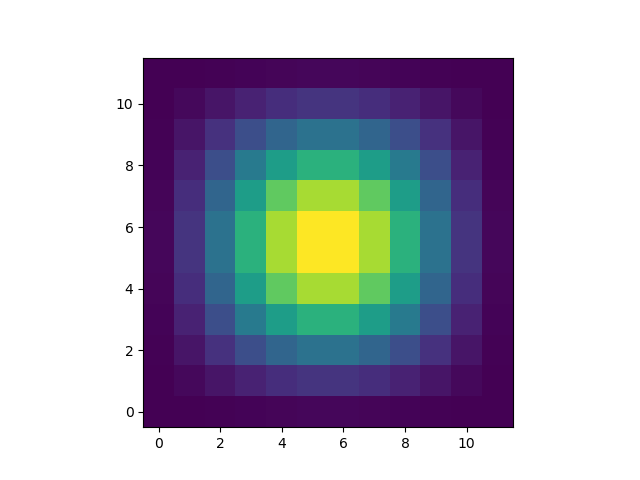

In [12]:
t = 0 # the time slice we wish to show
fig, ax = plt.subplots()
ax.imshow(window[:,:,t], origin='lower')
fig.show()

## Constructing Beta Model 

In [2]:
from noisegate.gater import BetaModel

In [3]:
from glob import glob
from noisegate.util import ImageLoader
folder = "/media/marcushughes/data/aia_data/01/"
paths = [fn for fn in sorted(glob(folder + "**/*.npz", recursive=True)) if "_0193.npz" in fn]
def load_fn(path):
    return np.load(path)['x']
widths = 5
loader = ImageLoader(paths, widths, 1, load_img=load_fn, capacity=10000)

In [4]:
patch = loader.fetch(np.array([0]))[0]

In [5]:
model = BetaModel(widths)
model.fit(loader, n=1000)

/home/marcushughes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


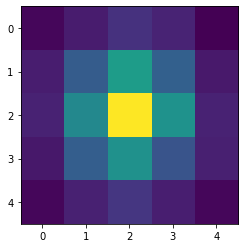

In [14]:
fig, ax = plt.subplots()
ax.imshow(model.beta[0])
fig.show()